<a href="https://colab.research.google.com/github/mrsbelema/belema/blob/main/CW_2_of_7120_belema_kio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [3]:
!pip install nltk contractions emoji textblob
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install wordcloud
!pip install nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SimpleRNN, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import wordcloud







Download necessary NLTK resources

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load the data from file

In [5]:
file_path = '/content/SemEval2017-task4-dev.subtask-A.english.INPUT.txt'
data = pd.read_csv(file_path, sep='\t', header=None)

In [7]:
# Display the first few rows to identify the correct columns
print(data.head())






                    0         1  \
0  619950566786113536   neutral   
1  619969366986235905   neutral   
2  619971047195045888  negative   
3  619974445185302528   neutral   
4  619987808317407232  positive   

                                                   2    3  
0  Picturehouse's, Pink Floyd's, 'Roger Waters: T...  NaN  
1  Order Go Set a Watchman in store or through ou...  NaN  
2  If these runway renovations at the airport pre...  NaN  
3  If you could ask an onstage interview question...  NaN  
4  A portion of book sales from our Harper Lee/Go...  NaN  


In [8]:
# Remove all columns other than sentiment and text
data = data.iloc[:, [1, 2]]
data.columns = ['sentiment', 'text']

bar chart that visualizes the distribution of sentiment

In [9]:
# Calculate the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()

<ipython-input-10-1524a93a1ebb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


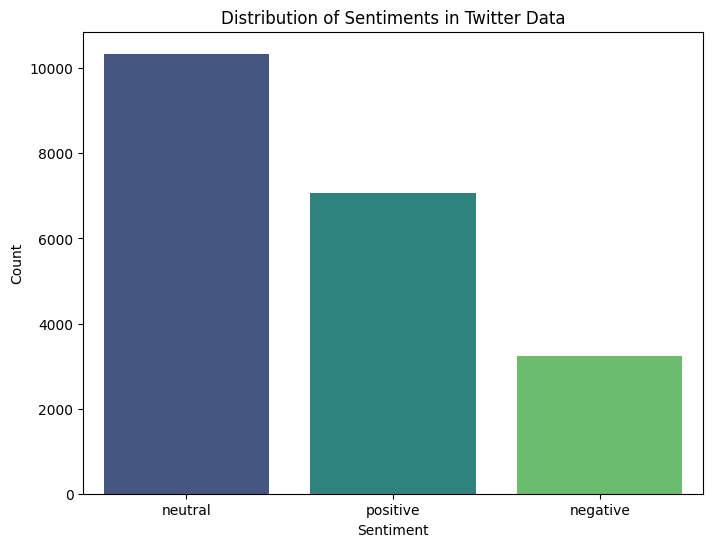

In [10]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Extract texts and labels

In [11]:
texts = data['text'].to_numpy()
labels = data['sentiment'].to_numpy()

Define function for text cleaning

In [12]:
# Step 1: Text Cleaning
def clean_text(text):
    # Remove Twitter handles (usernames)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    return text # Return the cleaned text

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    return text

# Clean and preprocess texts
cleaned_texts = [clean_text(text) for text in texts]

Tokenization, stopword removal, lemmatization

In [13]:
  #Step 2: Tokenization (splitting into words)
tokenized_texts = [nltk.word_tokenize(text) for text in cleaned_texts]
from nltk.corpus import stopwords
# Step 3: Stopword Removal
stop_words = set(stopwords.words('english'))  # Set of English stopwords
filtered_texts = [[word for word in tokens if word not in stop_words] for tokens in tokenized_texts]

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_texts = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in filtered_texts]

# Step 5: Joining tokens back into sentences
preprocessed_texts = [' '.join(tokens) for tokens in lemmatized_texts]

# Convert preprocessed_texts back to DataFrame to use .head() method
preprocessed_df = pd.DataFrame(preprocessed_texts, columns=['text'])
print(preprocessed_df.head())

                                                text
0  Picturehouses Pink Floyds Roger Waters The Wal...
1  Order Go Set Watchman store website Tuesday ge...
2  If runway renovation airport prevent seeing Ta...
3  If could ask onstage interview question Miss U...
4  A portion book sale Harper LeeGo Set Watchman ...


In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'preprocessed_texts' from your previous step contains the processed text data
# Create a DataFrame
df = pd.DataFrame({'processed_text': preprocessed_texts})

text_data = ' '.join(df['processed_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text_data)

# ... rest of your code for displaying the wordcloud

In [15]:
  #Step 2: Tokenization (splitting into words)
tokenized_texts = [nltk.word_tokenize(text) for text in cleaned_texts]
from nltk.corpus import stopwords
# Step 3: Stopword Removal
stop_words = set(stopwords.words('english'))  # Set of English stopwords
filtered_texts = [[word for word in tokens if word not in stop_words] for tokens in tokenized_texts]

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_texts = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in filtered_texts]

# Step 5: Joining tokens back into sentences
preprocessed_texts = [' '.join(tokens) for tokens in lemmatized_texts]

# Convert preprocessed_texts back to DataFrame to use .head() method
preprocessed_df = pd.DataFrame(preprocessed_texts, columns=['text'])
print(preprocessed_df.head())

                                                text
0  Picturehouses Pink Floyds Roger Waters The Wal...
1  Order Go Set Watchman store website Tuesday ge...
2  If runway renovation airport prevent seeing Ta...
3  If could ask onstage interview question Miss U...
4  A portion book sale Harper LeeGo Set Watchman ...


In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'preprocessed_texts' from your previous step contains the processed text data
# Create a DataFrame
df = pd.DataFrame({'processed_text': preprocessed_texts})

text_data = ' '.join(df['processed_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text_data)

# ... rest of your code for displaying the wordcloud

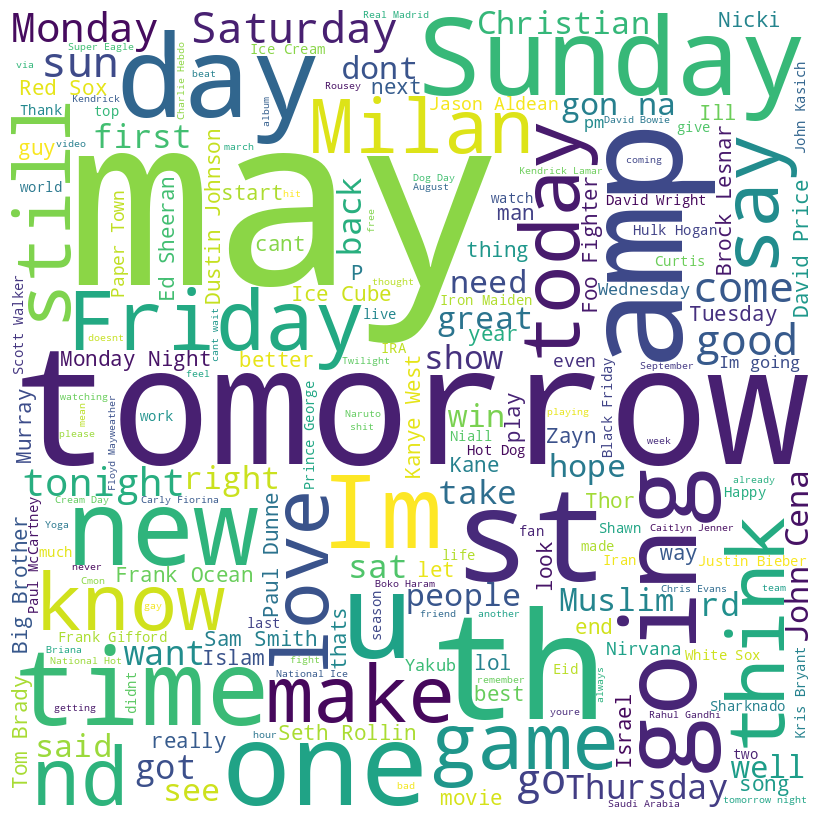

In [17]:
# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [18]:
# Parameters
max_words = 10000  # Max number of words to consider from the vocabulary
max_len = 100      # Max sequence length

In [19]:
# Vectorization setup
tokenizer = Tokenizer(num_words=max_words)

In [21]:
# Assuming labels are 'positive' and 'negative', convert them to 1 and 0
label_mapping = {'positive': 1.0, 'negative': 0.0}

In [22]:
# Filter out neutral labels
filtered_indices = [i for i, label in enumerate(labels) if label in label_mapping]
filtered_texts = [preprocessed_texts[i] for i in filtered_indices]
filtered_labels = [labels[i] for i in filtered_indices]

In [23]:
# Vectorization and padding for filtered texts
tokenizer.fit_on_texts(filtered_texts)
sequences = tokenizer.texts_to_sequences(filtered_texts)
X = pad_sequences(sequences, maxlen=max_len)

Text Vectorization and Padding

Splitting Data

In [24]:
# Filter out neutral labels
filtered_indices = [i for i, label in enumerate(labels) if label in label_mapping]
filtered_texts = [preprocessed_texts[i] for i in filtered_indices]
filtered_labels = [labels[i] for i in filtered_indices]

# Convert filtered labels to numeric
y = np.array([label_mapping[label] for label in filtered_labels])

# Vectorization and padding for filtered texts
tokenizer.fit_on_texts(filtered_texts)
sequences = tokenizer.texts_to_sequences(filtered_texts)
X = pad_sequences(sequences, maxlen=max_len)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [26]:
# Function to plot accuracy history
def plot_accuracy_history(history, title):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [27]:
# Function to plot accuracy and loss history
def plot_history(history, title):
    plt.figure(figsize=(12, 10))
    # Accuracy plot
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss plot
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [28]:
# Function to save results to CSV
def save_results_to_csv(results, filename='model_results.csv'):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Model', 'Class', 'Precision', 'Recall', 'F1-Score'])
        for result in results:
            for cls, pre, rec, f1 in zip(result['class_metrics']['class'], result['class_metrics']['precision'], result['class_metrics']['recall'], result['class_metrics']['f1']):
               writer.writerow([result['model'], cls, pre, rec, f1])

 #result = []





Building Models

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

max_words = 10000
max_len = 100

def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words,output_dim= 128))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

RNN Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

max_words = 10000  # Maximum number of words to consider from the vocabulary
max_len = 100  # Maximum sequence length

def create_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(SimpleRNN(128))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = create_rnn_model()
rnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

LSTM Model

In [31]:
from keras.layers import LSTM

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_len))
    model.add(LSTM(128))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 Training and Evaluation

Epoch 1/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7221 - loss: 0.5642 - val_accuracy: 0.8549 - val_loss: 0.3437
Epoch 2/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.9133 - loss: 0.2333 - val_accuracy: 0.8634 - val_loss: 0.3253
Epoch 3/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9705 - loss: 0.0953 - val_accuracy: 0.8543 - val_loss: 0.4103
Epoch 4/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9947 - loss: 0.0249 - val_accuracy: 0.8549 - val_loss: 0.5256
Epoch 5/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9994 - loss: 0.0070 - val_accuracy: 0.8476 - val_loss: 0.5732
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8195 - loss: 0.6797
CNN Model - Loss: 0.6959171891212463, Accuracy: 0.8250728845596313
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


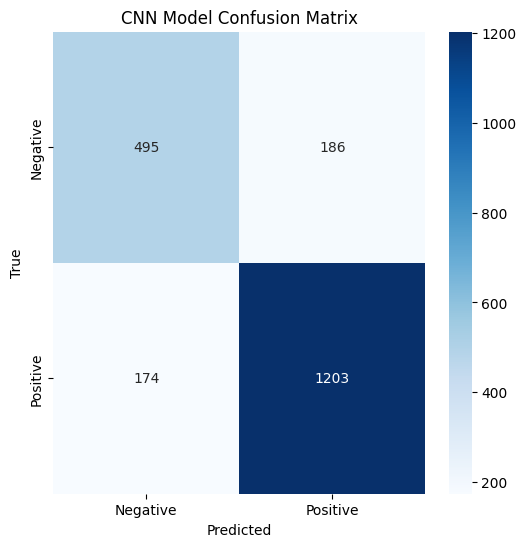

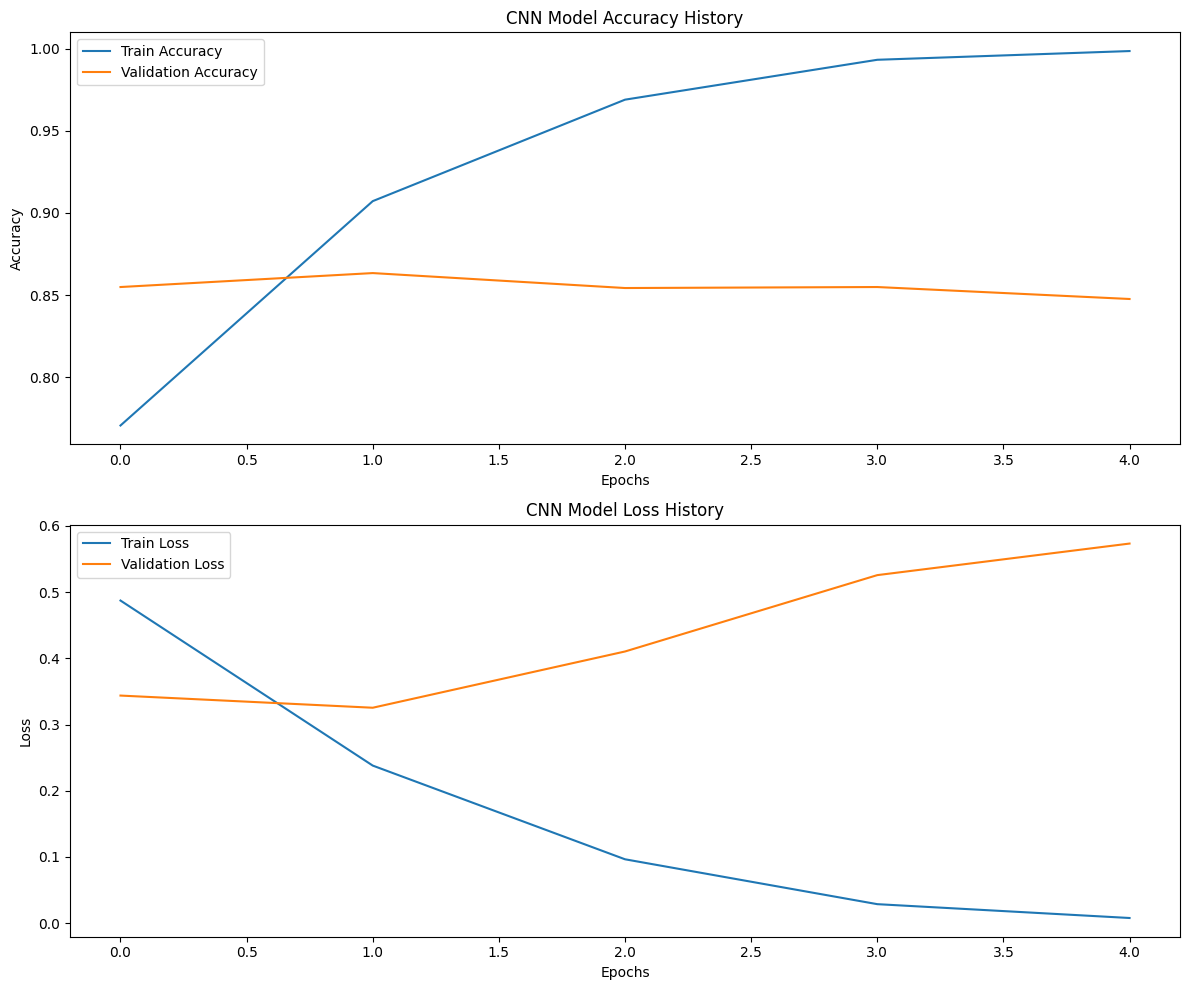

Epoch 1/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.6525 - loss: 0.6411 - val_accuracy: 0.6910 - val_loss: 0.6154
Epoch 2/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7046 - loss: 0.5971 - val_accuracy: 0.7201 - val_loss: 0.5505
Epoch 3/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8227 - loss: 0.4058 - val_accuracy: 0.8197 - val_loss: 0.4104
Epoch 4/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.9298 - loss: 0.1980 - val_accuracy: 0.8227 - val_loss: 0.4612
Epoch 5/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 0.9558 - loss: 0.1205 - val_accuracy: 0.8148 - val_loss: 0.5308
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8295 - loss: 0.5185
RNN Model - Loss: 0.5566509962081909, Accuracy: 0.8168124556541443
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


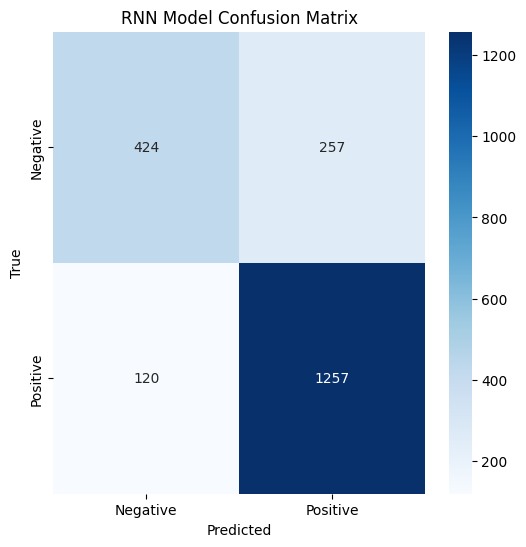

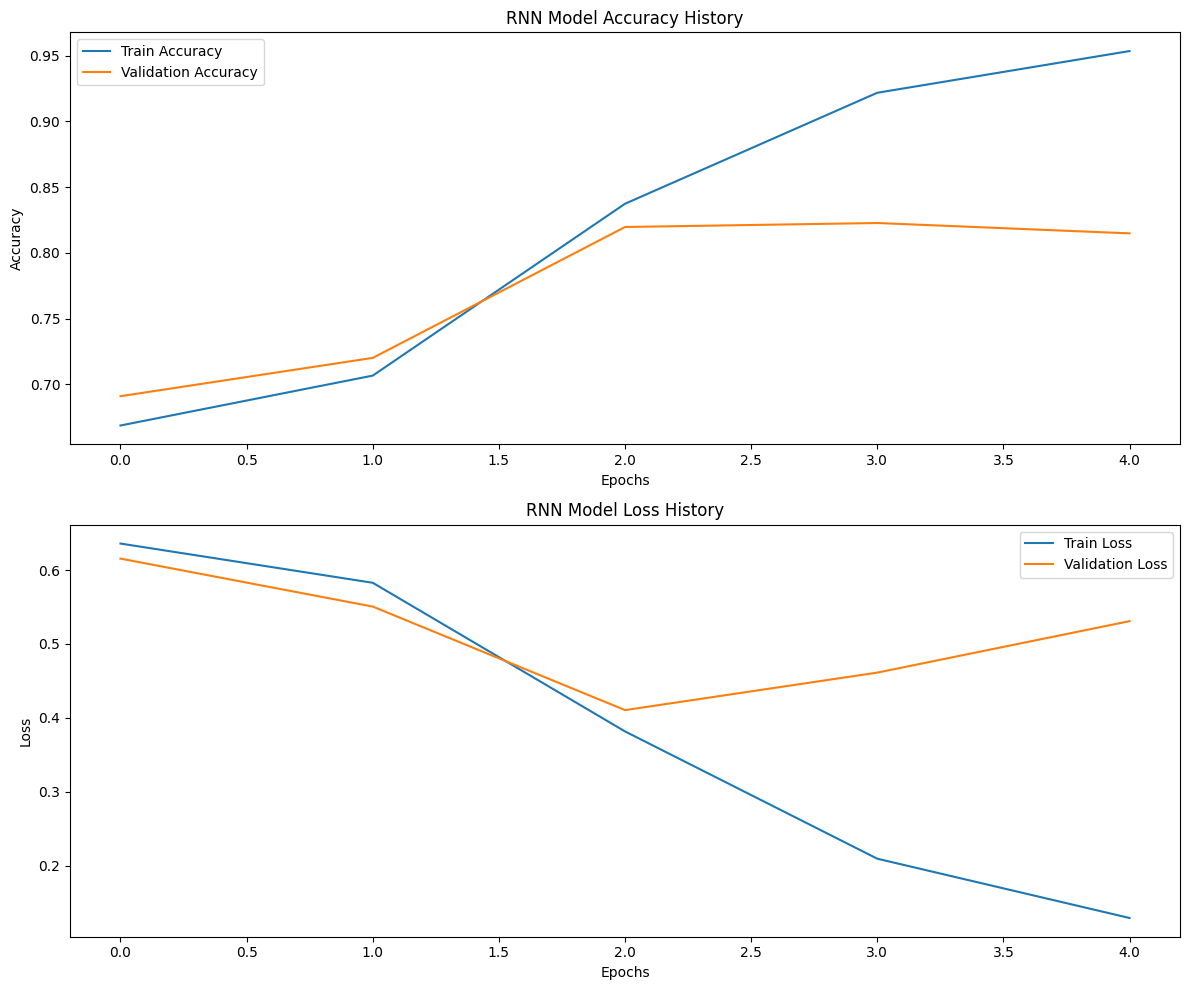

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 43s 198ms/step - accuracy: 0.7094 - loss: 0.5803 - val_accuracy: 0.8500 - val_loss: 0.3514
Epoch 2/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.8977 - loss: 0.2590 - val_accuracy: 0.8591 - val_loss: 0.3320
Epoch 3/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.9558 - loss: 0.1437 - val_accuracy: 0.8512 - val_loss: 0.3890
Epoch 4/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 43s 207ms/step - accuracy: 0.9753 - loss: 0.0773 - val_accuracy: 0.8476 - val_loss: 0.4426
Epoch 5/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.9843 - loss: 0.0543 - val_accuracy: 0.8434 - val_loss: 0.5104
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8327 - loss: 0.5581
LSTM Model - Loss: 0.5959511399269104, Accuracy: 0.8318756222724915
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step


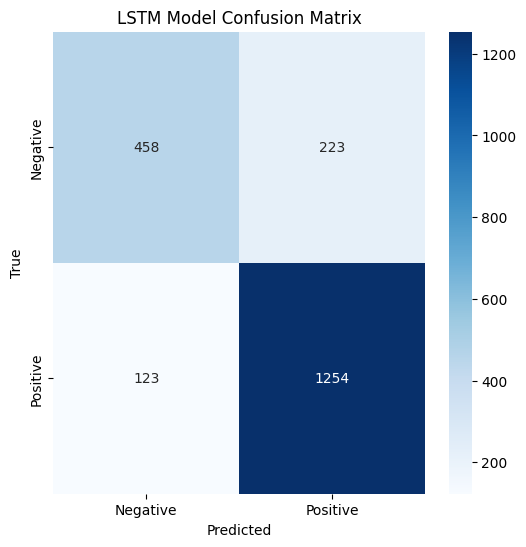

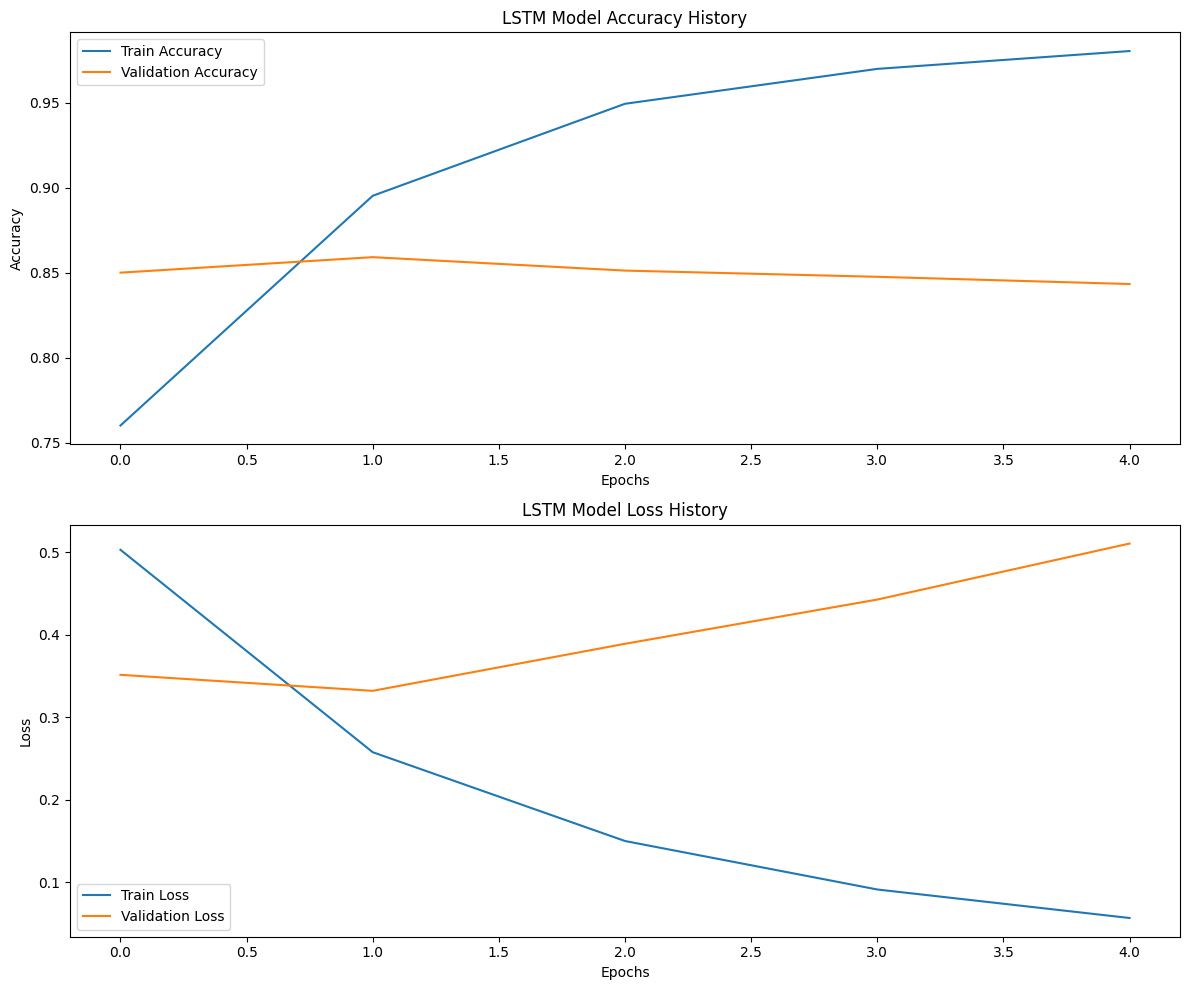

In [32]:
# Training the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluating the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model - Loss: {cnn_loss}, Accuracy: {cnn_accuracy}')
# Predict and plot confusion matrix for CNN
cnn_y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, cnn_y_pred, 'CNN Model Confusion Matrix')

# Plot accuracy history for CNN
plot_history(cnn_history, 'CNN Model')

# Training the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluating the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f'RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}')
# Predict and plot confusion matrix for RNN
rnn_y_pred = (rnn_model.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, rnn_y_pred, 'RNN Model Confusion Matrix')

# Plot accuracy history for RNN
plot_history(rnn_history, 'RNN Model')

create_lstm = create_lstm_model()
lstm_model.summary()
# Training the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluating the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}')
# Predict and plot confusion matrix for LSTM
lstm_y_pred = (lstm_model.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, lstm_y_pred, 'LSTM Model Confusion Matrix')

# Plot accuracy history for LSTM
plot_history(lstm_history, 'LSTM Model')



Initialize models

Function to train and evaluate a model

In [33]:
# Function to evaluate a model
def evaluate_model(model, x_test, labels_test):
    y_predicted = model.predict(x_test)

    accuracy = accuracy_score(labels_test, y_predicted)
    precision = precision_score(labels_test, y_predicted, average='weighted')
    recall = recall_score(labels_test, y_predicted, average='weighted')
    f1 = f1_score(labels_test, y_predicted, average='weighted')

    classes = ['negative', 'neutral', 'positive']
    class_metrics = {
        'class': classes,
        'precision': precision_score(labels_test, y_predicted, average=None, labels=classes),
        'recall': recall_score(labels_test, y_predicted, average=None, labels=classes),
        'f1': f1_score(labels_test, y_predicted, average=None, labels=classes)
    }

    print(f'\nModel: {type(model).__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    for cls, pre, rec, f1 in zip(class_metrics['class'], class_metrics['precision'], class_metrics['recall'], class_metrics['f1']):
        print(f'{cls.capitalize()} class - Precision: {pre:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}')
    print(f'Macro Average Precision: {precision:.4f}')
    print(f'Macro Average Recall: {recall:.4f}')
    print(f'Macro Average F1-Score: {f1:.4f}')

    return {
        'model': type(model).__name__,
        'accuracy': accuracy,
        'class_metrics': class_metrics
    }

Train and evaluate each model

Save Results to CSV

In [52]:
import csv # import the csv module
import csv

def save_results_to_csv(results, filename='model_results.csv'):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Model', 'Class', 'Precision', 'Recall', 'F1-Score'])
        for result in results:
            for cls, pre, rec, f1 in zip(result['class_metrics']['class'], result['class_metrics']['precision'], result['class_metrics']['recall'], result['class_metrics']['f1']):
                writer.writerow([result['model'], cls, pre, rec, f1])
            writer.writerow([result['model'], 'Macro Average', result['accuracy'], '', ''])

